We'll do the following:

- Define a weird polygon which wraps multiple times around the globe and which crosses multiple prime meridian representations.

- Find all relevant representations of the prime meridian to split with.

- Split the weird poly with all relevant prime meridians

- Translate all parts back to the base interval

In [1]:
from shapely.geometry import Polygon, MultiPolygon, LineString, MultiLineString
from shapely.ops import split
from shapely.affinity import translate

from matplotlib import pyplot as plt

In [2]:
weird_pg_lon_lat = Polygon(
    [(-540, 80), (-360, 70), (-180, 40), (180, -10), (920, -80), (270, -50)]
)

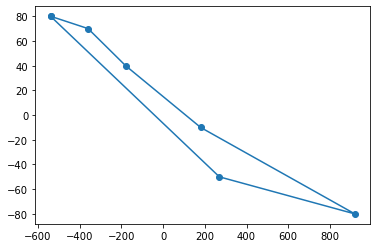

In [3]:
plt.plot(*weird_pg_lon_lat.exterior.xy, 'o-')

In [4]:
from math import ceil, floor

In [5]:
def find_all_relevant_prime_meridians(pg):
    lon_min, lon_max = weird_pg_lon_lat.bounds[0], weird_pg_lon_lat.bounds[2]
    first_prime = ceil(lon_min / 360) * 360
    last_prime = floor(lon_max / 360) * 360
    all_primes = range(first_prime, last_prime + 360, 360)
    all_prime_splitters = (
        LineString([(_prime_lon, -90.0), (_prime_lon, 0), (_prime_lon, 90.0)])
        for _prime_lon in all_primes
    )
    return all_prime_splitters

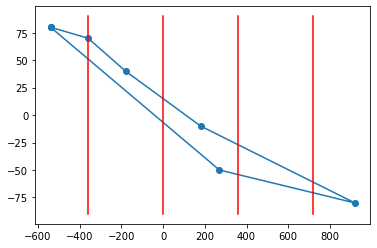

In [6]:
plt.plot(*weird_pg_lon_lat.exterior.xy, 'o-')
for _prime_splitter in find_all_relevant_prime_meridians(weird_pg_lon_lat):
    plt.plot(*_prime_splitter.xy, "r-")

In [7]:
def split_polys_multiple_times(poly, splitters):
    _poly = poly
    for _splitter in splitters:
        _poly = MultiPolygon(split(_poly, _splitter))
    return _poly

/tmp/ipykernel_552/586169076.py:4: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for _poly in split_polys_multiple_times(


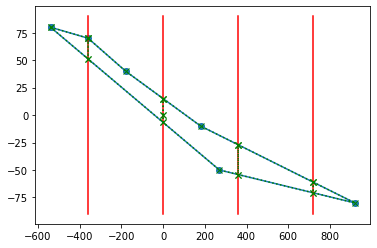

In [8]:
plt.plot(*weird_pg_lon_lat.exterior.xy, 'o-')
for _prime_splitter in find_all_relevant_prime_meridians(weird_pg_lon_lat):
    plt.plot(*_prime_splitter.xy, "r-")
for _poly in split_polys_multiple_times(
    weird_pg_lon_lat,
    find_all_relevant_prime_meridians(weird_pg_lon_lat),
):
    plt.plot(*_poly.exterior.xy, "gx:")

In [9]:
def _poly_to_base_interval(pg):
    lon_offset = - floor(pg.bounds[0] / 360) * 360
    return translate(pg, lon_offset)

def translate_to_base_interval(pg):
    return MultiPolygon(map(_poly_to_base_interval, pg.geoms))

/tmp/ipykernel_552/586169076.py:4: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for _poly in split_polys_multiple_times(


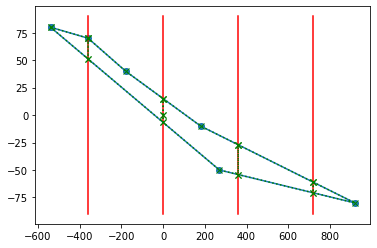

In [10]:
plt.plot(*weird_pg_lon_lat.exterior.xy, 'o-')
for _prime_splitter in find_all_relevant_prime_meridians(weird_pg_lon_lat):
    plt.plot(*_prime_splitter.xy, "r-")
for _poly in split_polys_multiple_times(
    weird_pg_lon_lat,
    find_all_relevant_prime_meridians(weird_pg_lon_lat),
):
    plt.plot(*_poly.exterior.xy, "gx:")

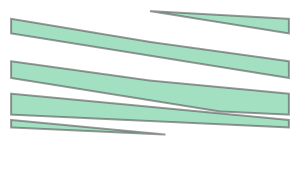

In [11]:
translate_to_base_interval(
    split_polys_multiple_times(
        weird_pg_lon_lat,
        find_all_relevant_prime_meridians(
            weird_pg_lon_lat
        ),
    ),
)